In [257]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('./Data/charity_data.csv')
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [258]:
# Generate our categorical variable list
charity_cat = charity_df.columns.tolist()

# Check the number of unique values in each column
charity_df[charity_cat].nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [259]:
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [260]:
charity_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

### Choosing Features

In [261]:
charity_int = charity_df.copy()
charity_int = charity_int.drop(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION','USE_CASE', 'ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS'], axis=1)

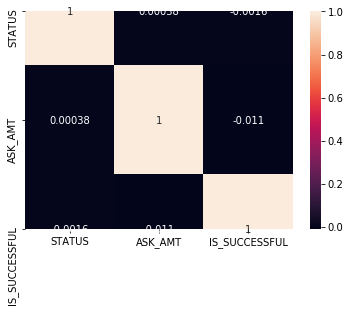

In [262]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = charity_int.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [263]:
#drop the EIN, Name column. Also dropping ask_amount and status due to no correlation with the is successful column
#use IS_SUCCESSFUL as the target and the rest and features

charity_names = charity_df.copy()
charity_names = charity_names.drop(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION','USE_CASE', 'ORGANIZATION', 'INCOME_AMT','SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL'], axis=1)
charity_names.head()

,EIN,NAME,STATUS,ASK_AMT
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,1,5000
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,1,108590
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,1,5000
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,1,6692
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,1,142590


In [264]:
charity_df = charity_df.drop(['EIN', 'NAME', 'ASK_AMT', 'STATUS'], axis=1)

In [265]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

### Bucketing Classfications

In [266]:
# Print out the Classification value counts
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts.to_list()

[17326,
 6074,
 4837,
 1918,
 1883,
 777,
 287,
 194,
 116,
 114,
 104,
 95,
 75,
 58,
 50,
 36,
 34,
 32,
 32,
 30,
 20,
 18,
 16,
 15,
 15,
 14,
 11,
 10,
 10,
 9,
 9,
 7,
 6,
 6,
 6,
 5,
 5,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

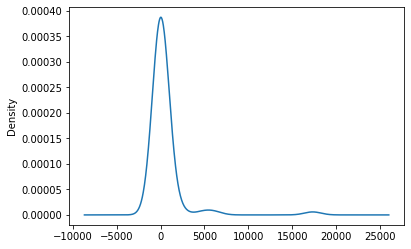

In [267]:
# Visualize the value counts
classification_counts.plot.density()

In [268]:
charity_df.CLASSIFICATION

0        C1000
1        C2000
2        C3000
3        C2000
4        C1000
         ...  
34294    C1000
34295    C3000
34296    C2000
34297    C3000
34298    C1000
Name: CLASSIFICATION, Length: 34299, dtype: object

In [269]:
# Print out the Classification value counts
apptype_counts = charity_df.APPLICATION_TYPE.value_counts()
apptype_counts.to_list()

[27037, 1542, 1216, 1173, 1065, 737, 725, 528, 156, 66, 27, 16, 3, 3, 2, 2, 1]

In [272]:
#based on the density curve above, all classifications under 100 unique instances can be bucketed into an other category

# Determine which values to replace
replace_classification = list(classification_counts[classification_counts < 100].index)
replace_apptype = list(apptype_counts[apptype_counts < 500].index)

# Replace in DataFrame
for classification in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,"Other")

for apptype in replace_apptype:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(apptype,"Other")

# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

### Encoding categorical variables using one-hot encoding

In [273]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION            12
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [274]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [275]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Standardize numerical variables using TensorFlow’s StandardScaler class

In [276]:
# Remove is_sucessfultarget from features data
y = charity_df.IS_SUCCESSFUL
X = charity_df.drop(columns=["IS_SUCCESSFUL"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [277]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.725


In [284]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5764 - accuracy: 0.7240
Epoch 2/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5535 - accuracy: 0.7327
Epoch 3/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5504 - accuracy: 0.7321
Epoch 4/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5486 - accuracy: 0.7331
Epoch 5/50
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5480 - accuracy: 0.7347s - loss: 0.5461 - accu
Epoch 6/50
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5466 - accuracy: 0.7351
Epoch 7/50
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5464 - accuracy: 0.7340
Epoch 8/50
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5455 - accuracy: 0.7356
Epoch 9/50
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5451 - accuracy

In [282]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [283]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Train on 25724 samples
Epoch 1/100
   32/25724 [..............................] - ETA: 6:57 - loss: 0.4195 - accuracy: 0.8438
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 13s - loss: 0.5306 - accuracy: 0.7373 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2112/25724 [=>............................] - ETA: 7s - loss: 0.5438 - accuracy: 0.7353 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3200/25724 [==>...........................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7406
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4096/25724 [===>..........................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7385
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5120/25724 [====>.........................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7422
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6144/25724 [======>.......................] - ETA: 2s - loss: 0.5321 - accuracy: 0.

 3904/25724 [===>..........................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7436
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7426
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7435
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7444
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7936/25724 [========>.....................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7423
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8960/25724 [=========>....................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7423
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5309 - accuracy: 0.7455
Epoch 00003: saving model to checkp

 8864/25724 [=========>....................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7447
Epoch 00005: saving model to checkpoints/weights.05.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7444
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7436
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11776/25724 [============>.................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7422
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7412
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5340 - accuracy: 0.7395
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5345 - accuracy: 0.7392
Epoch 00005: saving model to checkp

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5293 - accuracy: 0.7451
Epoch 00007: saving model to checkpoints/weights.07.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5295 - accuracy: 0.7453
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5302 - accuracy: 0.7444
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7433
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7430
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7427
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7416
Epoch 00007: saving model to checkp

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7401
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7413
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5344 - accuracy: 0.7406
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7405
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7412
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7422
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7417
Epoch 00009: saving model to checkp

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.7408
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7400
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5335 - accuracy: 0.7399
Epoch 12/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5604 - accuracy: 0.7500
Epoch 00012: saving model to checkpoints/weights.12.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.5429 - accuracy: 0.7391
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7488
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7411
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3712/25724 [==

 1408/25724 [>.............................] - ETA: 1s - loss: 0.5359 - accuracy: 0.7393
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7385
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7433
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7384
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7393
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7393
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7418
Epoch 00014: saving model to checkp

 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5262 - accuracy: 0.7451
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5241 - accuracy: 0.7458
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5267 - accuracy: 0.7450
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9408/25724 [=========>....................] - ETA: 1s - loss: 0.5289 - accuracy: 0.7446
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10400/25724 [===========>..................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7426
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11456/25724 [============>.................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7427
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12512/25724 [=============>................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7431
Epoch 00016: saving model to checkp

11136/25724 [===========>..................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7431
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7432
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7439
Epoch 00018: saving model to checkpoints/weights.18.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7432
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5330 - accuracy: 0.7433
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7424
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7418
Epoch 00018: saving model to checkp

16000/25724 [=================>............] - ETA: 0s - loss: 0.5317 - accuracy: 0.7418
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7432
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7434
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7429
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7436
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5303 - accuracy: 0.7437
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7424
Epoch 00020: saving model to checkp

20864/25724 [=======================>......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7402
Epoch 00022: saving model to checkpoints/weights.22.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7400
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7393
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7401
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5335 - accuracy: 0.7413
Epoch 23/100
   32/25724 [..............................] - ETA: 1s - loss: 0.6019 - accuracy: 0.6875
Epoch 00023: saving model to checkpoints/weights.23.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5081 - accuracy: 0.7522
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1856/25724 [=>

Epoch 25/100
   32/25724 [..............................] - ETA: 0s - loss: 0.5110 - accuracy: 0.8125
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5475 - accuracy: 0.7354
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7407
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7422
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7441
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5152/25724 [=====>........................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7418
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6176/25724 [======>.......................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7400
Epoch 00025: saving mo

 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7320
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7327
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7308
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7329
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7340
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8960/25724 [=========>....................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7318
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7331
Epoch 00027: saving model to checkp

 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5253 - accuracy: 0.7483
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5253 - accuracy: 0.7478
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5260 - accuracy: 0.7474
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7473
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7460
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5278 - accuracy: 0.7460
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5309 - accuracy: 0.7429
Epoch 00029: saving model to checkp

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7372
Epoch 00031: saving model to checkpoints/weights.31.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5371 - accuracy: 0.7364
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5370 - accuracy: 0.7366
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7367
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7374
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7388
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7391
Epoch 00031: saving model to checkp

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7430
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7430
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5325 - accuracy: 0.7420
Epoch 00033: saving model to checkpoints/weights.33.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7405
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5335 - accuracy: 0.7405
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7403
Epoch 00033: saving model to checkp

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5336 - accuracy: 0.7401
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7409
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5329 - accuracy: 0.7406
Epoch 36/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4762 - accuracy: 0.7812
Epoch 00036: saving model to checkpoints/weights.36.hdf5
  640/25724 [..............................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7344
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7488
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7407
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3712/25724 [==

 1856/25724 [=>............................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7430
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7418
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3872/25724 [===>..........................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7459
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4544/25724 [====>.........................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7438
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7436
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7403
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7365
Epoch 00038: saving model to checkp

 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7417
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5289 - accuracy: 0.7426
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7448
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9344/25724 [=========>....................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7444
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7456
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7434
Epoch 00040: saving model to checkpoints/weights.40.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7434
Epoch 00040: saving model to checkp

11136/25724 [===========>..................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7428
Epoch 00042: saving model to checkpoints/weights.42.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5300 - accuracy: 0.7420
Epoch 00042: saving model to checkpoints/weights.42.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7415
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5323 - accuracy: 0.7409
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7424
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7430
Epoch 00042: saving model to checkpoints/weights.42.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5307 - accuracy: 0.7435
Epoch 00042: saving model to checkp

16000/25724 [=================>............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7412
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7429
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7420
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7416
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7411
Epoch 00044: saving model to checkpoints/weights.44.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5319 - accuracy: 0.7416
Epoch 00044: saving model to checkp

20864/25724 [=======================>......] - ETA: 0s - loss: 0.5340 - accuracy: 0.7393
Epoch 00046: saving model to checkpoints/weights.46.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7397
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7398
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7403
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5332 - accuracy: 0.7404
Epoch 47/100
   32/25724 [..............................] - ETA: 0s - loss: 0.4727 - accuracy: 0.8125
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7412
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1824/25724 [=>

Epoch 49/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5913 - accuracy: 0.6875
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7490
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5295 - accuracy: 0.7451
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5270 - accuracy: 0.7448
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5246 - accuracy: 0.7473
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5255 - accuracy: 0.7465
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5241 - accuracy: 0.7463
Epoch 00049: saving mo

 4640/25724 [====>.........................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7369
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5472/25724 [=====>........................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7357
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6240/25724 [======>.......................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7362
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7200/25724 [=======>......................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7387
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8000/25724 [========>.....................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7399
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7378
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7396
Epoch 00051: saving model to checkp

 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7435
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.5289 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7457
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7447
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7430
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5297 - accuracy: 0.7436
Epoch 00053: saving model to checkp

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5357 - accuracy: 0.7389
Epoch 00055: saving model to checkpoints/weights.55.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7399
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7399
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5325 - accuracy: 0.7397
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7402
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7413
Epoch 00055: saving model to checkpoints/weights.55.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7419
Epoch 00055: saving model to checkp

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7427
Epoch 00057: saving model to checkpoints/weights.57.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7438
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5311 - accuracy: 0.7434
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7434
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7420
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7417
Epoch 00057: saving model to checkpoints/weights.57.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5325 - accuracy: 0.7411
Epoch 00057: saving model to checkp

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7418
Epoch 00059: saving model to checkpoints/weights.59.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7417
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5327 - accuracy: 0.7409
Epoch 60/100
   32/25724 [..............................] - ETA: 1s - loss: 0.3958 - accuracy: 0.8125
Epoch 00060: saving model to checkpoints/weights.60.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.5568 - accuracy: 0.7215
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7362
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7489
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 3712/25724 [==

 1408/25724 [>.............................] - ETA: 1s - loss: 0.5164 - accuracy: 0.7635
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5192 - accuracy: 0.7562
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5187 - accuracy: 0.7558
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5239 - accuracy: 0.7498
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7496
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5260 - accuracy: 0.7477
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7472
Epoch 00062: saving model to checkp

 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5263 - accuracy: 0.7443
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5259 - accuracy: 0.7456
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7462
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9344/25724 [=========>....................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7459
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10368/25724 [===========>..................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7459
Epoch 00064: saving model to checkpoints/weights.64.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7450
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5277 - accuracy: 0.7437
Epoch 00064: saving model to checkp

11136/25724 [===========>..................] - ETA: 0s - loss: 0.5299 - accuracy: 0.7405
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7406
Epoch 00066: saving model to checkpoints/weights.66.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5301 - accuracy: 0.7399
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7379
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7374
Epoch 00066: saving model to checkpoints/weights.66.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5359 - accuracy: 0.7363
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7356
Epoch 00066: saving model to checkp

16000/25724 [=================>............] - ETA: 0s - loss: 0.5321 - accuracy: 0.7406
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7411
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7411
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7409
Epoch 00068: saving model to checkpoints/weights.68.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7423
Epoch 00068: saving model to checkpoints/weights.68.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.5314 - accuracy: 0.7429
Epoch 00068: saving model to checkpoints/weights.68.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7417
Epoch 00068: saving model to checkp

20864/25724 [=======================>......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7439
Epoch 00070: saving model to checkpoints/weights.70.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5308 - accuracy: 0.7441
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7435
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5323 - accuracy: 0.7428
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5325 - accuracy: 0.7413
Epoch 71/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5060 - accuracy: 0.7500
Epoch 00071: saving model to checkpoints/weights.71.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.5051 - accuracy: 0.7643
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1472/25724 [>.

25724/25724 [==============================] - 2s 62us/sample - loss: 0.5325 - accuracy: 0.7418
Epoch 73/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7812
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5095 - accuracy: 0.7725
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5227 - accuracy: 0.7534
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5192 - accuracy: 0.7555
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5178 - accuracy: 0.7544
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5198 - accuracy: 0.7537
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 6144/25724 [==

 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7404
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7352
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7364
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7351
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7936/25724 [========>.....................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7340
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5367 - accuracy: 0.7343
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7360
Epoch 00075: saving model to checkp

 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7399
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7390
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5359 - accuracy: 0.7379
Epoch 00077: saving model to checkpoints/weights.77.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7395
Epoch 00077: saving model to checkpoints/weights.77.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7402
Epoch 00077: saving model to checkpoints/weights.77.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5316 - accuracy: 0.7401
Epoch 00077: saving model to checkpoints/weights.77.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5336 - accuracy: 0.7387
Epoch 00077: saving model to checkp

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5334 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5342 - accuracy: 0.7398
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7409
Epoch 00079: saving model to checkpoints/weights.79.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints/weights.79.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7398
Epoch 00079: saving model to checkpoints/weights.79.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7414
Epoch 00079: saving model to checkpoints/weights.79.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7410
Epoch 00079: saving model to checkp

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7426
Epoch 00081: saving model to checkpoints/weights.81.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7425
Epoch 00081: saving model to checkpoints/weights.81.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7416
Epoch 00081: saving model to checkpoints/weights.81.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7421
Epoch 00081: saving model to checkpoints/weights.81.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7414
Epoch 00081: saving model to checkpoints/weights.81.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5334 - accuracy: 0.7411
Epoch 00081: saving model to checkpoints/weights.81.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7410
Epoch 00081: saving model to checkp

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7411
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7410
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5319 - accuracy: 0.7409
Epoch 84/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7188
Epoch 00084: saving model to checkpoints/weights.84.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7409
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7392
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7437
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3712/25724 [==

 1408/25724 [>.............................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7479
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5258 - accuracy: 0.7488
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5243 - accuracy: 0.7497
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5221 - accuracy: 0.7496
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7433
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7431
Epoch 00086: saving model to checkp

 6272/25724 [======>.......................] - ETA: 2s - loss: 0.5240 - accuracy: 0.7492
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7455
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5258 - accuracy: 0.7451
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 9344/25724 [=========>....................] - ETA: 1s - loss: 0.5261 - accuracy: 0.7442
Epoch 00088: saving model to checkpoints/weights.88.hdf5
10368/25724 [===========>..................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7418
Epoch 00088: saving model to checkpoints/weights.88.hdf5
11392/25724 [============>.................] - ETA: 1s - loss: 0.5289 - accuracy: 0.7416
Epoch 00088: saving model to checkpoints/weights.88.hdf5
12416/25724 [=============>................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7403
Epoch 00088: saving model to checkp

11136/25724 [===========>..................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7407
Epoch 00090: saving model to checkpoints/weights.90.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7408
Epoch 00090: saving model to checkpoints/weights.90.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5348 - accuracy: 0.7399
Epoch 00090: saving model to checkpoints/weights.90.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7410
Epoch 00090: saving model to checkpoints/weights.90.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7423
Epoch 00090: saving model to checkpoints/weights.90.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5309 - accuracy: 0.7418
Epoch 00090: saving model to checkpoints/weights.90.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 00090: saving model to checkp

16000/25724 [=================>............] - ETA: 0s - loss: 0.5284 - accuracy: 0.7441
Epoch 00092: saving model to checkpoints/weights.92.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5288 - accuracy: 0.7439
Epoch 00092: saving model to checkpoints/weights.92.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7436
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7441
Epoch 00092: saving model to checkpoints/weights.92.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5304 - accuracy: 0.7435
Epoch 00092: saving model to checkpoints/weights.92.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7428
Epoch 00092: saving model to checkpoints/weights.92.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7440
Epoch 00092: saving model to checkp

19840/25724 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7385
Epoch 00094: saving model to checkpoints/weights.94.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5347 - accuracy: 0.7391
Epoch 00094: saving model to checkpoints/weights.94.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7397
Epoch 00094: saving model to checkpoints/weights.94.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7407
Epoch 00094: saving model to checkpoints/weights.94.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5332 - accuracy: 0.7408
Epoch 00094: saving model to checkpoints/weights.94.hdf5
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5317 - accuracy: 0.7420
Epoch 95/100
   32/25724 [..............................] - ETA: 1s - loss: 0.5111 - accuracy: 0.6875
Epoch 00095: saving model to checkpoints/weights.95.hdf5
  832/25724 [..

24704/25724 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.7409
Epoch 00096: saving model to checkpoints/weights.96.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5320 - accuracy: 0.7407
Epoch 97/100
   32/25724 [..............................] - ETA: 1s - loss: 0.4450 - accuracy: 0.7812
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7207
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7349
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7396
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5246 - accuracy: 0.7466
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5120/25724 [==

 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7443
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7414
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5267 - accuracy: 0.7457
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7404
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 7200/25724 [=======>......................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7408
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7421
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 9824/25724 [==========>...................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7428
Epoch 00099: saving model to checkp

In [285]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5557 - accuracy: 0.7258
Loss: 0.555706304273522, Accuracy: 0.7258309125900269


### Optimization

In [286]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5911 - accuracy: 0.6999
Epoch 2/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5536 - accuracy: 0.7310
Epoch 3/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5497 - accuracy: 0.7311s - loss: 0.5480 - accuracy: 
Epoch 4/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5480 - accuracy: 0.7317
Epoch 5/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5471 - accuracy: 0.7329
Epoch 6/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5458 - accuracy: 0.7345
Epoch 7/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5450 - accuracy: 0.7343
Epoch 8/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5446 - accuracy: 0.7351
Epoch 9/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.

25724/25724 [==============================] - 1s 42us/sample - loss: 0.5352 - accuracy: 0.7399
Epoch 74/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5355 - accuracy: 0.7391
Epoch 75/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5354 - accuracy: 0.7404
Epoch 76/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5352 - accuracy: 0.7393
Epoch 77/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5353 - accuracy: 0.7399s - loss: 0.5371 - accuracy:  - ETA: 0s
Epoch 78/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5349 - accuracy: 0.7403
Epoch 79/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5349 - accuracy: 0.7407
Epoch 80/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5351 - accuracy: 0.7399
Epoch 81/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5346 - accuracy: 

In [288]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 58us/sample - loss: 0.6297 - accuracy: 0.6707
Epoch 2/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5693 - accuracy: 0.7191
Epoch 3/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5587 - accuracy: 0.7218
Epoch 4/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5559 - accuracy: 0.7221
Epoch 5/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5540 - accuracy: 0.7229
Epoch 6/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5525 - accuracy: 0.7245
Epoch 7/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5517 - accuracy: 0.7250
Epoch 8/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5508 - accuracy: 0.7259
Epoch 9/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5506 - accuracy: 0.7261
Epoch

25724/25724 [==============================] - 1s 41us/sample - loss: 0.5423 - accuracy: 0.7361
Epoch 76/100
25724/25724 [==============================] - 1s 37us/sample - loss: 0.5418 - accuracy: 0.7359
Epoch 77/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5422 - accuracy: 0.7362
Epoch 78/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5417 - accuracy: 0.7358
Epoch 79/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5420 - accuracy: 0.7364
Epoch 80/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5422 - accuracy: 0.7365
Epoch 81/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5418 - accuracy: 0.7359
Epoch 82/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5420 - accuracy: 0.7365
Epoch 83/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5420 - accuracy: 0.7368
Epoch 84/100
25724/25724 [======